In [95]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [96]:
df= pd.read_csv('bank.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [97]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [98]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
df.Surname.unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [100]:
df.Geography.unique()




array(['France', 'Spain', 'Germany'], dtype=object)

In [101]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)


In [102]:
df.drop('Surname',axis='columns',inplace=True)
df1= df.copy()
df1.head()

KeyError: "['Surname'] not found in axis"

In [103]:
def print_unique_col_values(df1):
    
    
    
       for column in df1:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df1)               

TypeError: 'NoneType' object is not iterable

In [104]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)
df2 = pd.get_dummies(data=df1, columns=['Geography'])
df2.columns


TypeError: 'NoneType' object is not subscriptable

In [105]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0


In [106]:
df2.drop('Geography_Spain',axis='columns',inplace=True)


KeyError: "['Geography_Spain'] not found in axis"

In [107]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0


In [108]:

cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [109]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')
    

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [110]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0


In [111]:
x=df2.drop('Exited',axis='columns')
y= df2.Exited

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [113]:
X_train.shape

(8000, 11)

In [114]:
len(X_train.columns)

11

In [115]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7764
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7941
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4602 - accuracy: 0.7981
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8030
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8067
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8126
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4186 - accuracy: 0.8158
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8234
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8290
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3903 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8640
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8634
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8634
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8640
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8634
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8645
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8637
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8631
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8636
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 

In [116]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 995us/step - loss: 0.3453 - accuracy: 0.8580


[0.3452843427658081, 0.8579999804496765]

In [117]:
yp=model.predict(X_test)

In [118]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [119]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1615
           1       0.68      0.50      0.57       385

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

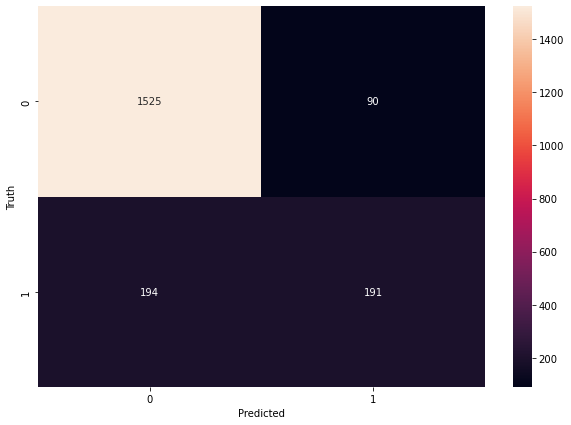

In [121]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')